비지도 학습의 또 다른 강력한 도구인 '계층적 군집화(Hierarchical Clustering)'를 다룬다.

이 시간의 핵심은 "데이터가 어떻게 뭉쳐가는지 그 역사(History)를 나무 모양(Dendrogram)으로 시각화하여 파악하는 것"이다. K-Means처럼 몇 개의 그룹을 만들지 미리 정할 필요가 없다는 점이 가장 큰 매력이다. 이 알고리즘이 어떻게 데이터의 '족보'를 만들어내는지 상세하게 설명한다.

---

# 📘 [3차] 3.1. 계층적 군집화: 데이터의 족보를 그리는 나무

## 1. K-Means의 고민과 계층적 접근의 등장

### 1) "몇 개로 나눌까요?"라는 난제
앞선 내용에서 배운 K-Means는 아주 훌륭한 알고리즘이지만, 시작부터 분석가에게 어려운 질문을 던진다.
> "그래서, $K$(그룹 개수)를 몇 개로 할 겁니까?"

데이터를 처음 받아본 분석가는 이 질문에 답하기 어렵다. 환자들을 3개 그룹으로 나누는 게 맞는지, 10개로 나누는 게 맞는지 알 수 없기 때문이다. 엘보우 기법 같은 힌트가 있지만, 결국은 사람의 주관적인 판단이 개입된다. 만약 $K$를 잘못 정하면, 전혀 다른 성향의 환자가 같은 그룹에 묶이거나, 같은 성향의 환자가 찢어지는 일이 발생한다.

### 2) 구조를 보고 싶다는 욕구
또한 K-Means는 최종 결과만 보여준다. "자, 여기 3개의 그룹입니다. 끝."
하지만 연구자들은 결과뿐만 아니라 과정과 구조가 궁금하다.
*   "A그룹과 B그룹은 원래 하나였는데 나중에 갈라진 걸까?"
*   "이 환자는 A그룹에 속해 있지만, 사실 B그룹과도 꽤 가깝지 않을까?"
*   "전체 데이터가 어떤 계층 구조(Hierarchy)를 이루고 있는가?"

이러한 갈증을 해소하기 위해 등장한 것이 바로 '계층적 군집화(Hierarchical Clustering)'이다. 이 방법은 데이터를 단번에 나누는 것이 아니라, 개별 데이터에서 시작해서 점점 덩어리를 키워나가는 방식을 취한다. 마치 생물학에서 '종-속-과-목-강-문-계'를 나누는 것과 비슷하다.

---

## 2. 작동 원리: 바텀업(Bottom-Up) 방식의 병합

계층적 군집화에는 크게 두 가지 방식이 있다. 큰 덩어리를 쪼개 나가는 분할형(Divisive, Top-Down)과 작은 덩어리를 합쳐 나가는 병합형(Agglomerative, Bottom-Up)이다. 머신러닝에서는 주로 계산 효율이 좋은 병합형을 사용한다.

이 과정을 "무인도에 떨어진 사람들"에 비유하여 단계별로 살펴보자.

### 1단계: 각자도생 (초기 상태)
무인도에 100명의 사람이 떨어졌다. 처음에는 서로를 모르기 때문에, 100명 모두가 각각 '나 홀로 그룹'이다. 즉, 클러스터의 개수는 100개이다.

### 2단계: 짝꿍 찾기 (가장 가까운 거리)
사람들은 외로움을 느끼고 주변을 탐색한다. 그리고 자신과 가장 가까운(유사한) 사람을 찾는다.
*   "어? 너랑 나랑 성향이 제일 비슷하네. 우리 둘이 팀 하자."
전체 100명 중 가장 거리가 가까운 두 명(혹은 두 그룹)이 합쳐져서 하나의 클러스터가 된다. 이제 클러스터 개수는 99개가 되었다.

### 3단계: 덩어리 키우기 (반복)
이 과정을 계속 반복한다.
*   이미 팀을 이룬 2명도 하나의 '단위'로 취급된다.
*   어떤 사람은 다른 혼자 있는 사람과 합쳐질 수도 있고, 어떤 사람은 이미 만들어진 팀에 흡수될 수도 있다.
*   혹은 이미 만들어진 두 팀이 서로 가까워서 더 큰 팀으로 합병될 수도 있다.

### 4단계: 천하통일 (종료)
점점 팀의 개수는 줄어들고 팀의 규모는 커진다. 99개, 98개, ..., 10개, ..., 2개.
마지막에는 모든 사람이 하나의 거대한 그룹으로 합쳐지게 된다. 클러스터 개수가 1개가 되면 알고리즘은 멈춘다.

이 모든 합병의 역사(History)를 기록해두면, 우리는 데이터가 미시적으로는 누구와 친하고 거시적으로는 어떤 구조인지 완벽하게 파악할 수 있다.

---

## 3. 시각화의 꽃: 덴드로그램 (Dendrogram)

계층적 군집화의 결과물은 엑셀 표가 아니라 '덴드로그램'이라는 트리 형태의 그림으로 표현된다. 이 그림을 해석하는 능력이 매우 중요하다.

### 1) 덴드로그램의 구조
*   x축 (Leaf): 개별 데이터 포인트(환자들)가 나열된다. 비슷한 환자끼리 옆에 배치된다.
*   y축 (Height): 거리(Distance) 혹은 비유사도(Dissimilarity)를 나타낸다.
*   가지(Branch): 두 개의 선이 만나서 하나로 합쳐지는 지점이 있다. 이 지점의 '높이(y축)'가 바로 두 그룹 간의 거리다.
    *   아래쪽에서 만났다 $\rightarrow$ 두 그룹이 매우 비슷하다.
    *   위쪽에서 만났다 $\rightarrow$ 두 그룹이 매우 다르지만 어쩔 수 없이 합쳐졌다.

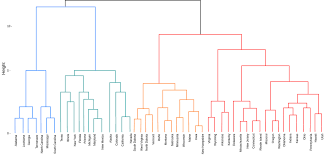


### 2) 가위로 가지치기 (Cutting the Tree)
K-Means에서는 $K$를 먼저 정하고 시작했다. 하지만 계층적 군집화에서는 이 덴드로그램을 다 그려놓고 나서 나중에 $K$를 정한다.
분석가는 덴드로그램을 보고 '가위'를 든다. 그리고 y축의 특정 높이(거리)에서 수평으로 선을 긋는다.
*   거리가 5인 지점에서 싹둑 자른다.
*   그때 잘린 세로선의 개수가 3개라면? $\rightarrow$ "이 데이터는 3개의 그룹으로 나누는 게 적절하겠군."
*   만약 좀 더 세분화하고 싶다면? 가위를 더 아래쪽(거리가 짧은 쪽)으로 가져가서 자른다. 그러면 5개, 6개로 그룹이 늘어난다.

즉, "데이터의 구조를 눈으로 확인한 뒤에, 상황에 맞춰 그룹의 개수를 유연하게 결정할 수 있다"는 것이 계층적 군집화의 최대 장점이다.

---

## 4. 거리 측정 방법: 연결법 (Linkage Methods)

"점과 점 사이의 거리"를 재는 건 쉽다. 자로 재면 된다. 하지만 "점과 덩어리", 혹은 "덩어리와 덩어리" 사이의 거리는 어떻게 재야 할까?
*   그룹 A: (환자 1, 환자 2)
*   그룹 B: (환자 3, 환자 4, 환자 5)

그룹 A와 그룹 B의 거리를 재는 기준을 무엇으로 하느냐에 따라 군집의 모양이 완전히 달라진다. 이를 '연결법(Linkage)'이라고 한다.

### 1) 최단 연결법 (Single Linkage): 친구의 친구는 친구다
*   방법: 두 그룹에 속한 멤버들 중 '가장 가까운 두 사람'의 거리를 그 그룹의 거리로 본다.
*   특징: A그룹의 끝자락과 B그룹의 끝자락이 조금만 가까워도 덜컥 합쳐버린다.
*   결과: 길게 늘어진 '사슬(Chain)' 모양의 클러스터를 잘 찾아낸다. 하지만 서로 다른 두 덩어리가 노이즈 데이터 하나 때문에 억지로 연결되는 부작용(Chain Effect)이 있다.

### 2) 최장 연결법 (Complete Linkage): 우리는 모두가 친해야 한다
*   방법: 두 그룹에 속한 멤버들 중 '가장 먼 두 사람'의 거리를 그 그룹의 거리로 본다.
*   특징: "가장 먼 사람끼리도 이 정도로는 가까워야 합친다"는 엄격한 기준이다.
*   결과: 지름이 비슷한 동글동글한 클러스터를 만든다. 하지만 이상치(Outlier)에 민감할 수 있다.

### 3) 평균 연결법 (Average Linkage): 민주주의
*   방법: 두 그룹의 모든 멤버 쌍(Pair)의 거리를 구해서 '평균'을 낸다.
*   특징: 최단과 최장의 절충안이다. 노이즈에 강하고 무난하다.

### 4) 와드 연결법 (Ward Linkage): 질서를 지켜라 (가장 중요)
*   방법: 단순히 거리를 재는 게 아니라, "두 그룹을 합쳤을 때 분산(Variance)이 얼마나 커지는가?"를 본다.
*   특징: 정보의 손실(분산 증가)을 최소화하는 방향으로 뭉친다. 내부적으로 비슷비슷한 애들끼리만 뭉치려고 한다.
*   결과: K-Means처럼 크기가 고르고 꽉 찬 클러스터를 만들어낸다. 대부분의 머신러닝 문제, 특히 헬스케어 데이터 분석에서 기본값(Default)으로 사용되는 가장 성능 좋은 방법이다.

---

## 5. 헬스케어에서의 활용 사례: 계통수와 아형 발견

계층적 군집화는 공학보다는 과학, 특히 생물학(Biology)과 의학(Medicine)에서 표준처럼 사용된다.

### 1) 유전체학: 암 환자의 가계도 그리기
수천 명의 유방암 환자가 있다. 이들의 유전자 발현 데이터를 계층적 군집화로 분석한다.
*   덴드로그램의 맨 위쪽 가지가 크게 두 갈래로 나뉜다. $\rightarrow$ "아, 유방암은 크게 A타입과 B타입으로 나뉘는구나."
*   A타입 가지를 따라 내려가니 또 두 갈래로 나뉜다. $\rightarrow$ "A타입 중에서도 생존율이 높은 그룹과 낮은 그룹이 있구나."
*   이렇게 발견된 하위 그룹(Subtype)은 새로운 치료제의 타겟이 된다. 이를 '정밀 의료(Precision Medicine)'라고 한다.

### 2) 바이러스의 진화: 계통수(Phylogenetic Tree)
코로나19 바이러스의 변이 과정을 추적할 때 뉴스에서 보던 나뭇가지 그림이 바로 이것이다.
*   유전자 서열이 비슷한 바이러스끼리 먼저 묶인다.
*   가지가 갈라지는 시점과 거리를 통해 "오미크론 변이는 델타 변이에서 언제쯤 갈라져 나왔는가?"를 추정한다.

### 3) 약물 반응성 그룹핑
신약 개발 단계에서, 다양한 화학 물질들이 인체에 미치는 영향을 분석한다.
*   반응 패턴이 유사한 약물끼리 군집화한다.
*   "이 신약은 기존의 독성이 강한 약물 그룹과 같은 가지에 묶이는구나. 개발을 중단해야겠다."라는 의사결정을 지원한다.

---

## 6. 요약:

1.  계층적 군집화: 데이터를 밑바닥부터 하나씩 합쳐가며(Agglomerative) 거대한 군집을 만드는 방법이다. K-Means와 달리 $K$를 미리 정할 필요가 없다.
2.  덴드로그램: 군집화의 역사를 기록한 나무 모양의 그래프다. 분석가는 이 그림을 보고 적절한 높이에서 잘라(Cut) 그룹의 개수를 결정한다.
3.  연결법(Linkage): 덩어리와 덩어리 사이의 거리를 재는 방법이다. 헬스케어에서는 데이터의 분산을 최소화하는 '와드(Ward) 연결법'을 주로 사용한다.
4.  장점: 데이터의 계층적 구조(Hierarchy)와 관계(Relationship)를 시각적으로 완벽하게 파악할 수 있다.
5.  활용: 유전체 분석, 환자 아형(Subtype) 발견, 바이러스 진화 추적 등 '구조의 이해'가 필요한 연구 분야에서 필수적이다.

## 3.2. \[예제 1\] 덴드로그램 그리기 기초 (Scipy)

계층적 군집화는 Scikit-learn뿐만 아니라 `scipy` 라이브러리를 통해서도
많이 수행된다. 특히 덴드로그램 시각화는 Scipy가 강력하다.

상황: 5명의 환자 데이터(간단한 2차원)가 어떻게 묶이는지 과정을
시각화한다.

``` python
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. 간단한 데이터 생성 (5개의 점)
# 환자 A~E의 두 가지 검사 수치
X = np.array([
    [1, 2], [2, 1],   # A, B는 서로 가까움
    [5, 5], [5, 6],   # C, D는 서로 가까움
    [8, 8]            # E는 멀리 떨어져 있음
])
labels = ['A', 'B', 'C', 'D', 'E']

# 2. 연결 행렬(Linkage Matrix) 생성
# method='ward': 와드 연결법 사용 (분산 최소화)
linked = linkage(X, method='ward')

# 3. 덴드로그램 그리기
plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           labels=labels,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Distance (Ward)')
plt.show()

# 설명:
# 1. (A, B)가 가장 먼저 묶이고, (C, D)가 묶인다. (높이가 낮음 = 거리가 가까움)
# 2. 그 다음 (C, D) 덩어리에 E가 합류한다. (혹은 E가 따로 남거나)
# 3. 마지막에 모든 그룹이 하나로 합쳐진다.
# 이 그림 하나로 데이터의 뭉침 순서를 완벽하게 파악할 수 있다.
```


> 📖 가이드
>
> 덴드로그램(Dendrogram)을 그리는 기초 방법을 배웁니다.
> - 연결(Linkage): 자석처럼 서로 끌어당겨 합쳐지는 과정을 기록한 족보입니다.
> - 높이(Height): 덴드로그램의 세로축은 '거리'를 뜻합니다. 아래쪽에서 만날수록 친한 사이(가까운 거리)이고, 위쪽에서 만날수록 먼 사이입니다.
> - 시각화: 이 그림 하나만 보면 데이터가 어떤 순서로 뭉쳤는지 한눈에 알 수 있습니다.



In [ ]:
# do write code


## 3.3. \[예제 2\] AgglomerativeClustering 사용법 (Scikit-learn)

머신러닝 파이프라인에 넣기 위해서는 Scikit-learn의 객체를 사용하는 것이
좋다.

상황: 가상의 데이터 덩어리를 3개로 나누기.

``` python
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# 1. 데이터 생성
X, y = make_blobs(n_samples=150, centers=3, cluster_std=1.0, random_state=42)

# 2. 모델 생성 및 학습
# n_clusters=3: 덴드로그램을 보고 3개로 자르기로 결정했다고 가정
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X)

# 3. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow', s=50)
plt.title('Agglomerative Clustering (n_clusters=3)')
plt.show()

# 설명:
# K-Means와 결과는 비슷해 보이지만, 내부적으로는 중심점(Centroid) 이동이 아니라
# 가까운 점들끼리 병합하는 과정을 거쳤다는 점이 다르다.
```


> 📖  가이드
>
> Scikit-learn의 `AgglomerativeClustering`을 이용해 실제로 그룹을 만들어봅니다.
> - K-Means와 비교: 중심점(Centroid) 이동 없이, 오직 '거리'만 보고 가까운 것끼리 합치면서(Bottom-Up) 그룹을 형성합니다.
> - 설정: 덴드로그램을 보고 "3개로 나누면 좋겠다"고 판단했다면 `n_clusters=3`으로 설정합니다.



In [ ]:
# do write code


## 3.4. \[예제 3\] 트리를 어디서 자를까? (Thresholding)

덴드로그램의 y축(거리)을 기준으로 자동으로 클러스터 개수를 결정해본다.

상황: “거리가 5 이상 벌어지면 다른 남남으로 보겠다”는 기준 적용.

``` python
# 1. 조금 더 복잡한 데이터 생성
X_more, _ = make_blobs(n_samples=50, centers=5, random_state=42)

# 2. 덴드로그램 다시 그리기
linked_more = linkage(X_more, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked_more)

# 기준선 긋기 (y=5)
plt.axhline(y=5, color='r', linestyle='--')
plt.title('Cutting the Dendrogram at Distance 5')
plt.show()

# 3. 모델 적용 (개수 대신 거리 기준 설정)
# n_clusters=None: 개수 안정함
# distance_threshold=5: 거리 5를 넘어가면 병합하지 마라 (여기서 멈춰라)
cluster_thresh = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='ward', distance_threshold=5)
labels_thresh = cluster_thresh.fit_predict(X_more)

print(f"거리 5를 기준으로 잘랐을 때 생성된 클러스터 개수: {cluster_thresh.n_clusters_}개")

# 설명:
# 덴드로그램에 빨간 점선을 그어보자. 그 점선과 만나는 세로줄의 개수가 바로 클러스터의 개수가 된다.
# 분석가는 이 선을 위아래로 움직이며 최적의 그룹 수를 결정할 수 있다.
```


> 📖  가이드
>
> 그룹의 개수($K$)를 정하는 대신, "거리 기준(Threshold)"으로 자르는 방법을 배웁니다.
> - 상황: "몇 개로 나눌지 모르겠는데, 거리가 5 이상 벌어지면 그냥 남남으로 치자."
> - 설정: `n_clusters=None`, `distance_threshold=5`
> - 효과: 데이터의 응집도에 따라 유연하게 그룹 개수가 자동 결정됩니다.



In [ ]:
# do write code


## 3.5. \[예제 4\] 연결법(Linkage)의 차이: 모양이 다른 데이터

데이터의 형태에 따라 어떤 연결법을 써야 하는지 비교한다.

상황: 초승달 모양(Moon shape)이나 길게 늘어진 데이터.

``` python
from sklearn.datasets import make_moons

# 1. 초승달 데이터 생성 (비선형)
X_moon, y_moon = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2. 연결법 비교 (Ward vs Single)
# Ward: 둥근 덩어리를 선호함 -> 초승달 같은 긴 데이터를 잘 못 다룸
model_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
pred_ward = model_ward.fit_predict(X_moon)

# Single: 가장 가까운 점을 연결 -> 친구의 친구를 따라가며 긴 모양도 잘 연결함
model_single = AgglomerativeClustering(n_clusters=2, linkage='single')
pred_single = model_single.fit_predict(X_moon)

# 3. 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_moon[:, 0], X_moon[:, 1], c=pred_ward, cmap='viridis')
axes[0].set_title('Ward Linkage (Fails on Moons)')

axes[1].scatter(X_moon[:, 0], X_moon[:, 1], c=pred_single, cmap='viridis')
axes[1].set_title('Single Linkage (Works on Moons)')

plt.show()

# 설명:
# 왼쪽(Ward)은 억지로 둥근 덩어리를 만들려다 보니 달 모양을 반으로 뚝 잘라버렸다.
# 오른쪽(Single)은 점들을 따라가며 연결해서 두 개의 초승달을 완벽하게 분리해냈다.
# 데이터가 둥글지 않고 길게 이어져 있다면 Single Linkage가 유용할 수 있다.
```


> 📖  가이드
>
> 데이터의 생긴 모양에 따라 연결법(Linkage)을 다르게 써야 함을 배웁니다.
> - Ward: 동그란 덩어리를 잘 뭉칩니다. (일반적인 경우 좋음)
> - Single: 길게 늘어진 모양(초승달, 뱀 모양)을 잘 연결합니다. (친구의 친구를 따라가는 방식)
> - 교훈: 무조건 Default(Ward)만 믿지 말고, 데이터 분포를 보고 전략을 선택해야 합니다.



In [ ]:
# do write code


## 3.6. \[예제 5\] 헬스케어 실전 시각화: 클러스터맵 (Clustermap)

생물학 논문에서 가장 많이 볼 수 있는 히트맵(Heatmap) + 덴드로그램
결합 형태이다. 환자와 유전자를 동시에 군집화한다.

상황: 환자 20명의 유전자 10개 발현량 데이터를 분석하여, 환자 유형과
유전자 패턴을 동시에 파악한다.

``` python
import seaborn as sns
import pandas as pd

# 1. 가상 유전자 데이터 생성
# 행: 환자(P1~P20), 열: 유전자(Gene1~Gene10)
np.random.seed(42)
data = np.random.rand(20, 10)
# 패턴 심기: 앞쪽 환자들은 앞쪽 유전자가 높고, 뒤쪽 환자들은 뒤쪽 유전자가 높음
data[:10, :5] += 1
data[10:, 5:] += 1

df_gene = pd.DataFrame(data,
                       index=[f'Patient_{i}' for i in range(1, 21)],
                       columns=[f'Gene_{i}' for i in range(1, 11)])

# 2. 클러스터맵 그리기 (Seaborn 활용)
# method='ward', metric='euclidean' 사용
sns.clustermap(df_gene, method='ward', cmap='viridis', standard_scale=1, figsize=(10, 8))
plt.show()

# 설명:
# - 위쪽 덴드로그램: 비슷한 '유전자'끼리 묶였다. (Gene 1~5 / Gene 6~10)
# - 왼쪽 덴드로그램: 비슷한 '환자'끼리 묶였다. (P1~P10 / P11~P20)
# - 히트맵: 노란색(고발현) 구역이 대각선으로 나뉘며 두 그룹의 차이를 명확히 보여준다.
# 이것이 헬스케어에서 '환자 아형(Subtype)'을 시각적으로 발견하는 가장 표준적인 방법이다.
```


> 📖 가이드
>
> 시각화인 클러스터맵(Clustermap)입니다.
> - 구조: 히트맵(색깔) + 가로 덴드로그램(환자 군집) + 세로 덴드로그램(유전자 군집).
> - 해석: "비슷한 환자끼리 모으고, 비슷한 유전자끼리 모았더니, 특정 유전자 그룹이 특정 환자 그룹에서만 빨갛게(고발현) 나타나는구나!"를 발견하는 것이 목표입니다.



In [ ]:
# do write code
